In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [10]:
tesla=pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-03,392.443329,405.130005,384.206665,404.619995,404.619995,103885500
1,2021-11-04,411.470001,414.496674,405.666656,409.970001,409.970001,76192200
2,2021-11-05,409.333344,413.290009,402.666656,407.363342,407.363342,64886400
3,2021-11-08,383.263336,399.000000,377.666656,387.646667,387.646667,100337100
4,2021-11-09,391.200012,391.500000,337.173340,341.166656,341.166656,177317400


In [11]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [12]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [16]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2021-11-03 00:00:00 2022-11-03 00:00:00
Total days = 365 days


In [17]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,293.285573,300.445903,284.918445,292.446166,292.446166,8.045382e+07
std,49.858127,50.175803,48.312300,49.174077,49.174077,2.199467e+07
min,205.820007,213.500000,198.589996,204.990005,204.990005,3.504270e+07
25%,249.339996,255.160004,241.160004,246.789993,246.789993,6.488640e+07
50%,294.003326,300.359985,285.820007,292.116669,292.116669,7.762060e+07
75%,333.096680,340.396667,325.100006,332.673340,332.673340,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.773174e+08


<AxesSubplot:>

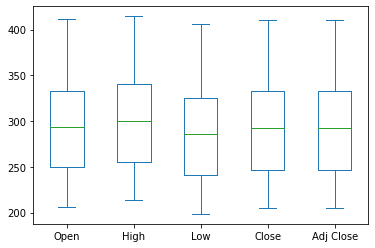

In [18]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [21]:
layout=go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
         title='Date',
         titlefont=dict(
             family='Courier New ,monospace',
             size=18,
             color='#7f7f7f'
         )
    ),
    yaxis=dict(
         title='Price',
         titlefont=dict(
             family='Courier New ,monospace',
             size=18,
             color='#7f7f7f'
         )
    )
)
tesla_data=[{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

In [22]:
iplot(plot)

In [25]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [27]:
#split the data into train and test set
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.3,random_state=101)

In [28]:
scaler=StandardScaler().fit(X_train)

In [29]:
from sklearn.linear_model import LinearRegression

In [33]:
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [34]:
#Plot actual and predicted values for train dataset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

In [35]:
iplot(plot2)

In [37]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.4987883045203425	0.5071702135883669
MSE       1224.3892332878534	1145.6130125996124

